In [1]:
import numpy as np 

from scipy.integrate import solve_ivp

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['text.usetex']=True
mpl.rcParams['text.latex.preamble']=r'\boldmath'

In [2]:
# Some helper functions

def plot_vector_field(A, xmin=-2, xmax=2, ymin=-2, ymax=2, xstep=0.25, ystep=0.25, ax=None, **kwargs):
    x1 = np.arange(xmin, xmax, xstep)
    x2 = np.arange(ymin, ymax, ystep)

    X1, X2 = np.meshgrid(x1, x2)
    dX1 = A[0, 0] * X1 + A[0, 1] * X2
    dX2 = A[1, 0] * X1 + A[1, 1] * X2
    
    if ax is None:
        ax = plt.gca()
    ax.quiver(X1, X2, dX1 / (0.001 + np.sqrt(dX1 ** 2 + dX2 ** 2)), dX2  / (0.001 + np.sqrt(dX1 ** 2 + dX2 ** 2)), headwidth=2.5, **kwargs)
    
    
def plot_axes(ax=None, xmin=-1.2, xmax=1.2, xstep=0.1, ymin=-1.2, ymax=1.2, ystep=0.1):
    if ax is None:
        ax = plt.gca()
    
    x_ticks = np.arange(xmin, xmax, xstep)
    x_ticks_major = x_ticks[x_ticks != 0]
    y_ticks = np.arange(ymin, ymax, ystep)
    y_ticks_major = y_ticks[y_ticks != 0]

    ax.set_xticks(x_ticks_major)
    ax.set_yticks(y_ticks_major)

    labels = [item.get_text() for item in ax.get_xticklabels()]

    empty_string_labels = ['']*len(labels)
    ax.set_xticklabels(empty_string_labels)
    labels = [item.get_text() for item in ax.get_yticklabels()]

    empty_string_labels = ['']*len(labels)
    ax.set_yticklabels(empty_string_labels)

    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    
def plot_ellipse(ax, P=np.eye(2), r=1.0):
    """
    Plots level set of the function V(x) = x^T Px
    """
    theta_range = np.arange(0, 2 * np.pi, 2 * np.pi / 1000)
    T = np.vstack((np.cos(theta_range), np.sin(theta_range)))
    
    E, V = np.linalg.eig(P)
    v1 = np.sqrt(r ** 2 / E[0]) * V[:, 0]
    v2 = np.sqrt(r ** 2 / E[1]) * V[:, 1]
    W = np.hstack((v1[:, np.newaxis], v2[:, np.newaxis]))
    circ = W @ T
    
    ax.plot(circ[0, :], circ[1, :], c=c_blue)
    

def plot_ring_vectors(ax, A, P=np.eye(2), r=1.0, num_vectors=20):
    """
    Plots vector field of \dot{x} = Ax along the level set of the function V(x) = x^T Px
    """
    
    theta_range = np.arange(0, 2 * np.pi, 2 * np.pi / num_vectors)
    T = np.vstack((np.cos(theta_range), np.sin(theta_range)))

    E, V = np.linalg.eig(P)
    v1 = np.sqrt(r ** 2 / E[0]) * V[:, 0]
    v2 = np.sqrt(r ** 2 / E[1]) * V[:, 1]
    W = np.hstack((v1[:, np.newaxis], v2[:, np.newaxis]))

    circ = W @ T    
    ax.scatter(circ[0, :], circ[1, :], c=c_blue, s=10)

    for i in range(20):
        u = circ[:, i]
        v = A @ u

        du = P @ u
        du = du / np.linalg.norm(du)

        if np.dot(v, du) < 0:
            v = v / np.linalg.norm(v)
            ax.arrow(u[0], u[1], 0.1 * v[0], 0.1 * v[1], 
                shape='full', lw=1, length_includes_head=False, head_width=.03, color="g", zorder=10)
        else:
            v = v / np.linalg.norm(v)
            ax.arrow(u[0], u[1], 0.1 * v[0], 0.1 * v[1], 
                shape='full', lw=1, length_includes_head=False, head_width=.03, color="r", zorder=10)

        ax.arrow(u[0], u[1], 0.1  * du[0], 0.1  * du[1], shape='full', lw=1, length_includes_head=False, head_width=.03, color=c_blue, zorder=10)

In [3]:
c_blue = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
c_orange = plt.rcParams['axes.prop_cycle'].by_key()['color'][1]

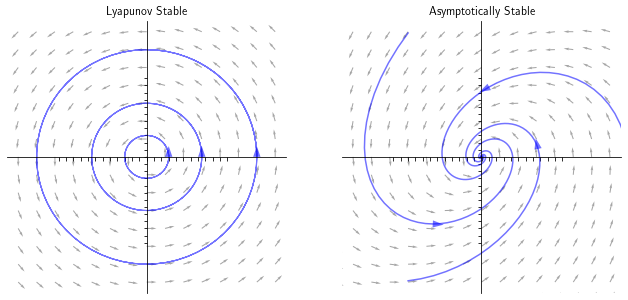

In [4]:
try:
    plt.close(fig)
except NameError:
    pass

fig, ax = plt.subplots(1, 2, figsize=(11, 5))

A = np.array([[0, -1], [1, 0]])
B = np.array([[-0.1, -1], [1, -0.7]])
    
rs = [0.3, 0.75, 1.5]
solsA = list()
for r in rs:
    solsA.append(solve_ivp(lambda t, x: A @ x, [0, 20], [r, 0], max_step=0.1))
    
angles = [2 * np.pi *  float(i) / 3 for i in range(3)]
solsB = list()

for theta in angles:
    solsB.append(solve_ivp(lambda t, x: B @ x, [0, 30], [2 * np.cos(theta), 2 * np.sin(theta)], max_step=0.1))
    
plot_vector_field(A, ax=ax[0], alpha=0.35)
plot_vector_field(B, ax=ax[1], alpha=0.35)

for sol in solsA:
    ax[0].plot(sol.y[0, :], sol.y[1, :], c='b', linewidth=1.1, alpha=0.55)
    ax[0].arrow(sol.y[0, 0], sol.y[1, 0], sol.y[0, 1] - sol.y[0, 0], sol.y[1, 1] - sol.y[1, 0], 
                shape='full', lw=0, length_includes_head=False, head_width=.1, color='b', alpha=0.55)

idx = 20
for sol in solsB:
    ax[1].plot(sol.y[0, :], sol.y[1, :], c='b', alpha=0.55)
    ax[1].arrow(sol.y[0, idx], sol.y[1, idx], sol.y[0, idx + 1] - sol.y[0, idx], sol.y[1, idx + 1] - sol.y[1, idx], 
            shape='full', lw=0, length_includes_head=False, head_width=.1, color='b', alpha=0.55)
    
r = 1.0
t = np.arange(0, 2 * np.pi, 0.01)
    
ax[0].set_xlim([-1.9, 1.9])
ax[0].set_ylim([-1.9, 1.9])

ax[1].set_xlim([-1.9, 1.9])
ax[1].set_ylim([-1.9, 1.9])

plot_axes(ax[0])
plot_axes(ax[1])

ax[0].set_title('Lyapunov Stable')
ax[1].set_title('Asymptotically Stable')

plt.savefig("figures/stability.png")

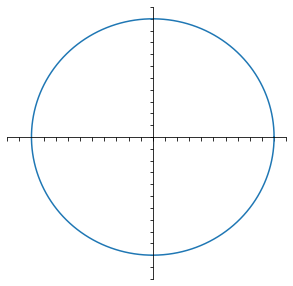

In [5]:
plt.close(fig)
fig, ax = plt.subplots(figsize=(5, 5))

t = np.arange(0, 2 * np.pi, 0.01)

ax.plot(np.cos(t), np.sin(t))
plot_axes(ax)
plt.savefig("figures/circle.png")

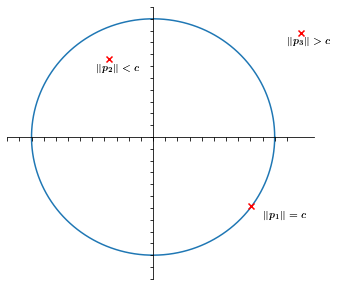

In [6]:
plt.close(fig)
fig, ax = plt.subplots(figsize=(5.5, 5))

t = np.arange(0, 2 * np.pi, 0.01)

p1 = 0.75 * np.exp(1j * 0.33 * 2 * np.pi)
p2 = 1.5 * np.exp(1j * 0.1 * 2 * np.pi)
p3 = 1.0 * np.exp(1j * 1.8 * np.pi)

ax.plot(np.cos(t), np.sin(t), zorder=0)

ax.scatter([np.real(p1), np.real(p2), np.real(p3)], [np.imag(p1), np.imag(p2), np.imag(p3)], c='r', marker="x", zorder=1)
ax.text(np.real(p1)-0.1, np.imag(p1) -0.1, s=r"$\Vert p_2 \Vert < c$")
ax.text(np.real(p2)-0.1, np.imag(p2) -0.1, s=r"$\Vert p_3 \Vert > c$")
ax.text(np.real(p3)+0.1, np.imag(p3) -0.1, s=r"$\Vert p_1 \Vert = c$")

plot_axes(ax)
plt.savefig("figures/circle_points.png")

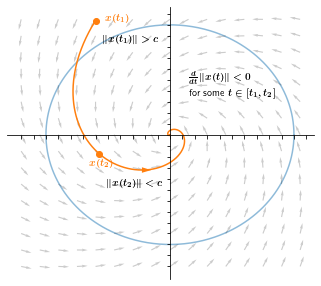

In [7]:
plt.close(fig)
fig, ax = plt.subplots(figsize=(5.5, 5))

t = np.arange(0, 2 * np.pi, 0.01)
ax.plot(np.cos(t), np.sin(t), zorder=0, alpha=0.5)


B = np.array([[-0.5, -1], [1, -0.7]])
theta = 2 * np.pi / 3
sol = solve_ivp(lambda t, x: B @ x, [0, 30], [1.2 * np.cos(theta), 1.2 * np.sin(theta)], max_step=0.01)

plot_vector_field(B, ax=ax, xmin=-1.2, xmax=1.2, ymin=-1.2, ymax=1.2, xstep=0.15, ystep=0.15, alpha=0.2)
ax.plot(sol.y[0, :], sol.y[1, :])

idx1 = np.where(np.abs(np.linalg.norm(sol.y, axis=0) - 0.5) < 0.1)[0][0]
idx2 = np.where(np.abs(np.linalg.norm(sol.y, axis=0) - 1.2) < 0.1)[0][0]

ax.text(sol.y[0, idx1] - 0.08, sol.y[1, idx1] - 0.12, s=r"$x(t_2)$", color=c_orange)
ax.text(sol.y[0, idx1] + 0.06, sol.y[1, idx1] - 0.3, s=r"$\Vert x(t_2) \Vert < c$")

ax.text(sol.y[0, idx2] + 0.08, sol.y[1, idx2] - 0.01, s=r"$x(t_1)$", color=c_orange)
ax.text(sol.y[0, idx2] + 0.06, sol.y[1, idx2] - 0.2, s=r"$\Vert x(t_1) \Vert > c$")

ax.text(0.15, 0.5, s=r"$\frac{d}{dt} \Vert x(t) \Vert < 0$")
ax.text(0.15, 0.35, s=r"for some $t \in [t_1, t_2]$")


ax.scatter(sol.y[0, [idx1, idx2]], sol.y[1, [idx1, idx2]], c=c_orange)
ax.arrow(sol.y[0, 200], sol.y[1, 200], sol.y[0, 201] - sol.y[0, 200], sol.y[1, 201] - sol.y[1, 200], 
        shape='full', lw=0, length_includes_head=False, head_width=.05, color=c_orange)

plot_axes(ax)
plt.savefig("figures/circ_solution.png")

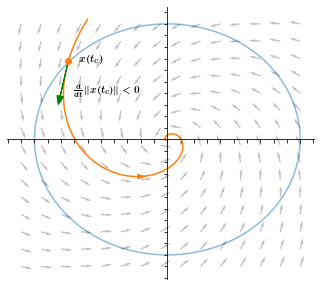

In [8]:
plt.close(fig)
fig, ax = plt.subplots(figsize=(5.5, 5))

ax.plot(np.cos(t), np.sin(t), zorder=0, alpha=0.5)

plot_vector_field(B, ax=ax, xmin=-1.1, xmax=1.1, ymin=-1.1, ymax=1.1, xstep=0.15, ystep=0.15, alpha=0.25)
ax.plot(sol.y[0, :], sol.y[1, :])
ax.arrow(sol.y[0, 200], sol.y[1, 200], sol.y[0, 201] - sol.y[0, 200], sol.y[1, 201] - sol.y[1, 200], 
        shape='full', lw=0, length_includes_head=False, head_width=.05, color=c_orange)

idx_intersect = np.where(np.abs(np.linalg.norm(sol.y, axis=0) - 1.0) < 0.01)[0][0]
ax.text(sol.y[0, idx_intersect] + 0.08, sol.y[1, idx_intersect] - 0.01, s=r"$x(t_c)$")
ax.scatter(sol.y[0, idx_intersect], sol.y[1, idx_intersect], c=c_orange, zorder=11)


v = B @ sol.y[:, idx_intersect]
ax.arrow(sol.y[0, idx_intersect], sol.y[1, idx_intersect], 0.2 * v[0], 0.25 * v[1], 
        shape='full', lw=1, length_includes_head=False, head_width=.05, color="g", zorder=10)

ax.text(-0.7, 0.4, s=r"$\frac{d}{dt} \Vert x(t_c) \Vert < 0$", color="k")

plot_axes(ax)
plt.savefig("figures/circ_tangent.png")

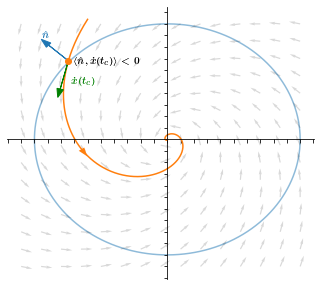

In [9]:
plt.close(fig)
fig, ax = plt.subplots(figsize=(5.5, 5))

ax.plot(np.cos(t), np.sin(t), zorder=0, alpha=0.5)
plot_vector_field(B, ax=ax, xmin=-1.1, xmax=1.1, ymin=-1.1, ymax=1.1, xstep=0.15, ystep=0.15, alpha=0.15)

ax.plot(sol.y[0, :], sol.y[1, :])
ax.arrow(sol.y[0, 110], sol.y[1, 110], sol.y[0, 111] - sol.y[0, 110], sol.y[1, 111] - sol.y[1, 110], 
        shape='full', lw=0, length_includes_head=False, head_width=.05, color=c_orange)

ax.scatter(sol.y[0, idx_intersect], sol.y[1, idx_intersect], c=c_orange, zorder=11)

ax.arrow(sol.y[0, idx_intersect], sol.y[1, idx_intersect], 0.2 * v[0], 0.2 * v[1], 
        shape='full', lw=1, length_includes_head=False, head_width=.05, color="g", zorder=10)

ax.arrow(sol.y[0, idx_intersect], sol.y[1, idx_intersect], 0.2 * sol.y[0, idx_intersect], 0.2 * sol.y[1, idx_intersect], 
        shape='full', lw=1, length_includes_head=False, head_width=.05, color=c_blue, zorder=10)

ax.text(sol.y[0, idx_intersect] + 0.02, sol.y[1, idx_intersect] - 0.2, s=r"$\dot{x}(t_c)$", color="g", zorder=100)
ax.text(sol.y[0, idx_intersect] - 0.2, sol.y[1, idx_intersect] + 0.2, s=r"$\hat{n}$", color=c_blue, zorder=100)
ax.text(-0.7, 0.65, s=r"$\langle \hat{n}, \dot{x}(t_c)\rangle < 0$", color="k", zorder=100)

plot_axes(ax)
plt.savefig("figures/circle_innerp.png")

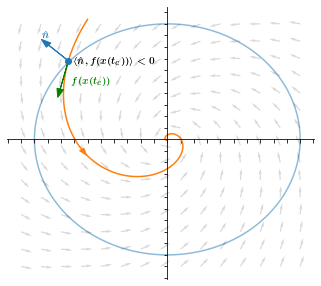

In [10]:
plt.close(fig)
fig, ax = plt.subplots(figsize=(5.5, 5))

ax.plot(np.cos(t), np.sin(t), zorder=0, alpha=0.5)
plot_vector_field(B, ax=ax, xmin=-1.1, xmax=1.1, ymin=-1.1, ymax=1.1, xstep=0.15, ystep=0.15, alpha=0.15)

ax.plot(sol.y[0, :], sol.y[1, :])
ax.arrow(sol.y[0, 110], sol.y[1, 110], sol.y[0, 111] - sol.y[0, 110], sol.y[1, 111] - sol.y[1, 110], 
        shape='full', lw=0, length_includes_head=False, head_width=.05, color=c_orange)

ax.scatter(sol.y[0, idx_intersect], sol.y[1, idx_intersect], c=c_blue, zorder=11)

ax.arrow(sol.y[0, idx_intersect], sol.y[1, idx_intersect], 0.2 * v[0], 0.2 * v[1], 
        shape='full', lw=1, length_includes_head=False, head_width=.05, color="g", zorder=10)

ax.arrow(sol.y[0, idx_intersect], sol.y[1, idx_intersect], 0.2 * sol.y[0, idx_intersect], 0.2 * sol.y[1, idx_intersect], 
        shape='full', lw=1, length_includes_head=False, head_width=.05, color=c_blue, zorder=10)

ax.text(sol.y[0, idx_intersect] + 0.02, sol.y[1, idx_intersect] - 0.2, s=r"$f(x(t_c))$", color="g", zorder=100)
ax.text(sol.y[0, idx_intersect] - 0.2, sol.y[1, idx_intersect] + 0.2, s=r"$\hat{n}$", color=c_blue, zorder=100)
ax.text(-0.7, 0.65, s=r"$\langle \hat{n}, f(x(t_c))\rangle < 0$", color="k", zorder=100)

plot_axes(ax)
plt.savefig("figures/circle_innerp.png")

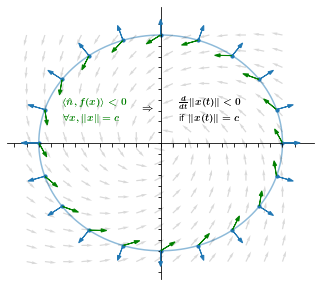

In [11]:
plt.close(fig)
fig, ax = plt.subplots(figsize=(5.5, 5))

plot_vector_field(B, ax=ax, xmin=-1.1, xmax=1.1, ymin=-1.1, ymax=1.1, xstep=0.15, ystep=0.15, alpha=0.15)
ax.plot(np.cos(t), np.sin(t), zorder=0, alpha=0.5, c=c_blue)
plot_ring_vectors(ax, B, r=1.0)

ax.text(0.15, 0.35, s=r"$\frac{d}{dt} \Vert x(t) \Vert < 0$")
ax.text(0.15, 0.2, s=r"if $\Vert x(t) \Vert = c$")
ax.text(-0.15, 0.275, s=r"$\Rightarrow$")
ax.text(-0.8, 0.35, s=r"$\langle \hat{n}, f(x)\rangle < 0$", color="g", zorder=100)
ax.text(-0.8, 0.2, s=r"$\forall x, \Vert x \Vert = c$", color="g", zorder=100)

plot_axes(ax)
plt.savefig("figures/circ_spider.png")

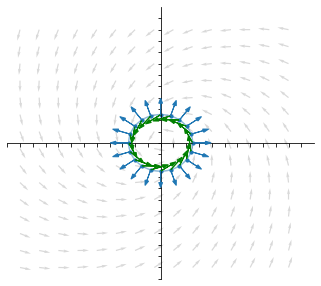

In [12]:
# Create separate pngs then compile them into gif using the convert utility in imagemagick
# Shell command to create the animation: `convert -delay 10 -loop 0 circ_spider-*.png circ_spider.gif`
#
# We can also use the matplotlib.animation API to create animations directly but I find this way is much easier

for r_idx, r in enumerate(np.linspace(1.00, 0.25, 120)):
    plt.close(fig)
    fig, ax = plt.subplots(figsize=(5.5, 5))

    plot_vector_field(B, ax=ax, xmin=-1.1, xmax=1.1, ymin=-1.1, ymax=1.1, xstep=0.15, ystep=0.15, alpha=0.15)
    ax.plot(r * np.cos(t), r * np.sin(t), zorder=0, alpha=0.5, c=c_blue)
    plot_ring_vectors(ax, B, r=r)

    plot_axes(ax)
    ax.set_xlim([-1.2, 1.2])
    ax.set_ylim([-1.2, 1.2])

    plt.savefig("figures/circ_spider-%d.png" % r_idx)

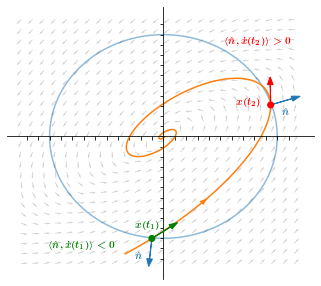

In [13]:
plt.close(fig)
fig, ax = plt.subplots(figsize=(5.5, 5))

t = np.arange(0, 2 * np.pi, 0.01)
ax.plot(np.cos(t), np.sin(t), zorder=0, alpha=0.5)


B = np.array([[ 0.23353769, -0.72409208],
              [ 0.47590793, -0.53353769]])
theta = 0.705 * 2 * np.pi
sol = solve_ivp(lambda t, x: B @ x, [0, 30], [1.2 * np.cos(theta), 1.2 * np.sin(theta)], max_step=0.01)
ax.plot(sol.y[0, :], sol.y[1, :])
plot_vector_field(B, ax=ax, xmin=-1.25, xmax=1.25, ymin=-1.25, ymax=1.25, xstep=0.10, ystep=0.10, alpha=0.2)
ax.arrow(sol.y[0, 100], sol.y[1, 100], sol.y[0, 101] - sol.y[0, 100], sol.y[1, 101] - sol.y[1, 100], 
        shape='full', lw=0, length_includes_head=False, head_width=.05, color=c_orange)


indices = np.where(np.abs(np.linalg.norm(sol.y, axis=0) - 1.0) < 0.01)[0]
idx1 = indices[0]
idx2 = indices[4]
ax.scatter(sol.y[0, [idx1, idx2]], sol.y[1, [idx1, idx2]], c=["g", "r"], zorder=11)


v = B @ sol.y[:, idx1]
v = v / np.linalg.norm(v)
ax.arrow(sol.y[0, idx1], sol.y[1, idx1], 0.2 * v[0], 0.2 * v[1], 
        shape='full', lw=1, length_includes_head=False, head_width=.05, color="g", zorder=10)
ax.arrow(sol.y[0, idx1], sol.y[1, idx1], 0.2 * sol.y[0, idx1], 0.2 * sol.y[1, idx1], 
        shape='full', lw=1, length_includes_head=False, head_width=.05, color=c_blue)
ax.text(sol.y[0, idx1]-0.15, sol.y[1, idx1] + 0.1, r"$x(t_1)$", c="g")
ax.text(sol.y[0, idx1]-0.15, sol.y[1, idx1] - 0.2, r"$\hat{n}$", c=c_blue)
ax.text(sol.y[0, idx1]-0.9, sol.y[1, idx1] - 0.1, r"$\langle \hat{n}, \dot{x}(t_1) \rangle < 0$", c="g")


v = B @ sol.y[:, idx2]
v = v / np.linalg.norm(v)
ax.arrow(sol.y[0, idx2], sol.y[1, idx2], 0.2 * v[0], 0.2 * v[1], 
        shape='full', lw=1, length_includes_head=False, head_width=.05, color="r", zorder=10)
ax.arrow(sol.y[0, idx2], sol.y[1, idx2], 0.2 * sol.y[0, idx2], 0.2 * sol.y[1, idx2], 
        shape='full', lw=1, length_includes_head=False, head_width=.05, color=c_blue)
ax.text(sol.y[0, idx2] - 0.3, sol.y[1, idx2], r"$x(t_2)$", c="r")
ax.text(sol.y[0, idx2] + 0.1, sol.y[1, idx2] - 0.1, r"$\hat{n}$", c=c_blue)
ax.text(sol.y[0, idx2]-0.4, sol.y[1, idx2] + 0.6, r"$\langle \hat{n}, \dot{x}(t_2) \rangle > 0$", c="r")


plot_axes(ax)
plt.savefig("figures/circle_fail.png")

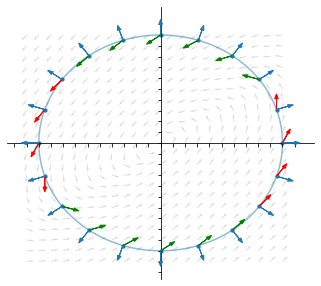

In [14]:
try:
    plt.close(fig)
except NameError:
    pass

fig, ax = plt.subplots(figsize=(5.5, 5))

t = np.arange(0, 2 * np.pi, 0.01)
r = 1.0
ax.plot(r * np.cos(t), r * np.sin(t), zorder=0, alpha=0.5)

plot_axes(ax)
plot_vector_field(B, ax=ax, xmin=-1.1, xmax=1.1, ymin=-1.1, ymax=1.1, xstep=0.10, ystep=0.10, alpha=0.15)
plot_ring_vectors(ax, B, r=1.0)

plt.savefig("figures/circle_fail_spider.png")

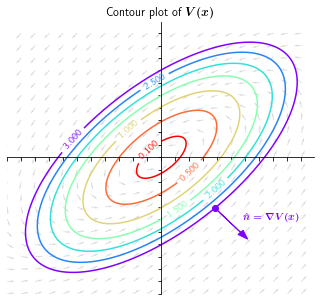

In [15]:
from scipy.linalg import solve_lyapunov
P = solve_lyapunov(B.T, -np.eye(2))

plt.close(fig)
fig, ax = plt.subplots(figsize=(5.5, 5))
plot_axes(ax)

x1 = np.arange(-1.1, 1.1, 0.01)
x2 = np.arange(-1.1, 1.1, 0.01)
X1, X2 = np.meshgrid(x1, x2)

Z = X1 * P[0, 0] * X1 + X1 * P[0, 1] * X2 + X2 * P[1, 0] * X1 + X2 * P[1, 1] * X2

contour = ax.contour(X1, X2, Z, levels=[0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0], cmap="rainbow_r")
ax.clabel(contour, inline=1, fontsize=10)
ax.set_title(r"Contour plot of $V(x)$")

E, V = np.linalg.eig(P)
v1 = np.sqrt(3.0 / E[0]) * V[:, 0]
v2 = np.sqrt(3.0 / E[1]) * V[:, 1]
V = np.hstack((v1[:, np.newaxis], v2[:, np.newaxis]))
theta = -6 * np.pi  / 4
u = np.array([np.cos(theta), np.sin(theta)])
x = np.dot(V, u)

p = P @ x
cmap = plt.get_cmap("rainbow_r")

ax.scatter(x[0], x[1], color=cmap(1.0))
ax.arrow(x[0], x[1], 0.05 * p[0], 0.05 * p[1], 
        shape='full', lw=1, length_includes_head=False, head_width=.05, color=cmap(1.0))
ax.text(x[0] + 0.2, x[1] -0.1, r"$\hat{n} = \nabla V(x)$", c=cmap(1.0))

plot_vector_field(B, ax=ax, xmin=-1.1, xmax=1.1, ymin=-1.1, ymax=1.1, xstep=0.10, ystep=0.10, alpha=0.15)
plt.savefig("figures/contour.png")

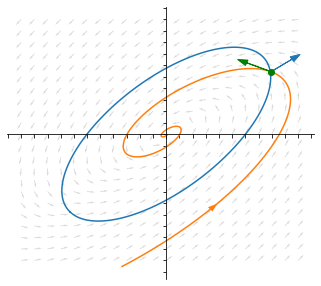

In [16]:
plt.close(fig)
fig, ax = plt.subplots(figsize=(5.5, 5))
plot_axes(ax)
plot_vector_field(B, ax=ax, xmin=-1.1, xmax=1.1, ymin=-1.1, ymax=1.1, xstep=0.10, ystep=0.10, alpha=0.15)

r = np.sqrt(2)
plot_ellipse(ax, P, r=r)

theta = 0.705 * 2 * np.pi
sol = solve_ivp(lambda t, x: B @ x, [0, 30], [1.2 * np.cos(theta), 1.2 * np.sin(theta)], max_step=0.01)
ax.plot(sol.y[0, :], sol.y[1, :], c=c_orange, label=r"$x(t)$")
ax.arrow(sol.y[0, 100], sol.y[1, 100], sol.y[0, 101] - sol.y[0, 100], sol.y[1, 101] - sol.y[1, 100], 
        shape='full', lw=0, length_includes_head=False, head_width=.05, color=c_orange)

U, S, V = np.linalg.svd(P)
Psqrt = U @ np.diag(np.sqrt(S)) @ V
indices = np.where(np.abs(np.linalg.norm(Psqrt @ sol.y, axis=0) - r) < 0.01)[0]
idx1 = indices[0]
ax.scatter(sol.y[0, idx1], sol.y[1, idx1], c="g", zorder=11)

v = B @ sol.y[:, idx1]
v = v / np.linalg.norm(v)
ax.arrow(sol.y[0, idx1], sol.y[1, idx1], 0.2 * v[0], 0.2 * v[1], 
        shape='full', lw=1, length_includes_head=False, head_width=.05, color="g", zorder=10)
ax.arrow(sol.y[0, idx1], sol.y[1, idx1], 0.2 * sol.y[0, idx1], 0.2 * sol.y[1, idx1], 
        shape='full', lw=1, length_includes_head=False, head_width=.05, color=c_blue)

plt.savefig("figures/lyap_trajectory.png")

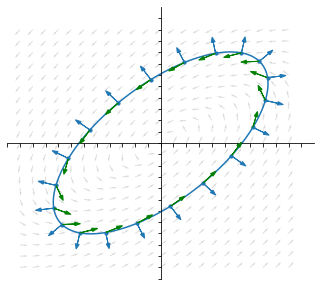

In [17]:
plt.close(fig)
fig, ax = plt.subplots(figsize=(5.5, 5))

plot_axes(ax)
plot_vector_field(B, ax=ax, xmin=-1.1, xmax=1.1, ymin=-1.1, ymax=1.1, xstep=0.10, ystep=0.10, alpha=0.15)
plot_ellipse(ax, P, r=1.5)
plot_ring_vectors(ax, B, P, r=1.5)

ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
plt.savefig("figures/lyap_spider.png")

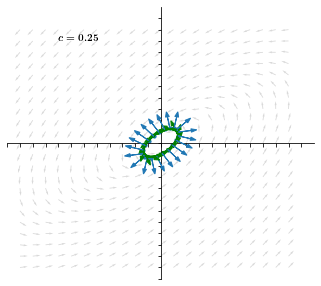

In [18]:
# Create separate pngs then compile them into gif using `convert -delay 10 -loop 0 lyap_spider-*.png lyap_spider.gif`

for r_idx, r in enumerate(np.linspace(2, 0.25, 70)):    
    plt.close(fig)
    fig, ax = plt.subplots(figsize=(5.5, 5))
   
    plot_axes(ax)
    plot_vector_field(B, ax=ax, xmin=-1.1, xmax=1.1, ymin=-1.1, ymax=1.1, xstep=0.10, ystep=0.10, alpha=0.15)
    plot_ellipse(ax, P, r=r)
    plot_ring_vectors(ax, B, P, r=r)

    ax.set_xlim([-1.2, 1.2])
    ax.set_ylim([-1.2, 1.2])
    ax.text((-0.8), (0.9), s=r"$c=%1.2f$" % r, color="k", fontsize=10, zorder=100)
    plt.savefig("figures/lyap_spider-%d.png" % r_idx)